# Quantum Teleportation

In [8]:
import qiskit
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute,  transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.test.mock import FakeTokyo

<IPython.core.display.Latex object>

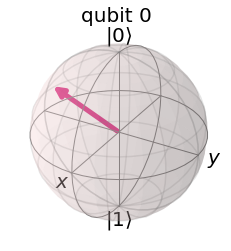

In [2]:
from qiskit_textbook.tools import random_state

# Create random 1-qubit state
psi = random_state(1)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [3]:
def new_bob_gates(qc, a, b, c):
    qc.cx(b, c)
    qc.cz(a, c)

In [4]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [6]:
from qiskit.extensions import Initialize
init_gate = Initialize(psi)
init_gate.label = "init"

In [7]:
inverse_init_gate = init_gate.gates_to_uncompute()

# Multi- Qubit Test

In [15]:
def qubit(n):
    qc = QuantumCircuit(3*n,n)

    # First, let's initialize Alice's q0
    for i in range(n):
        qc.append(init_gate, [i])

    qc.barrier()

    # Now begins the teleportation protocol
    for i in range(n):
        create_bell_pair(qc, i+n, 2*n+i)
    qc.barrier()
    # Send q1 to Alice and q2 to Bob
    for i in range(n):
        alice_gates(qc, i, i+n)
    qc.barrier()
    # Alice sends classical bits to Bob
    for i in range(n):
        new_bob_gates(qc, i,i+n,2*n+i)

    # We undo the initialization process
    for i in range(n):
        qc.append(inverse_init_gate, [2*n+i])

    # See the results, we only care about the state of qubit 2
    for i in range(n):
        qc.measure(2*n+i,i)

    # View the results:
    return qc

## N = 1 Case

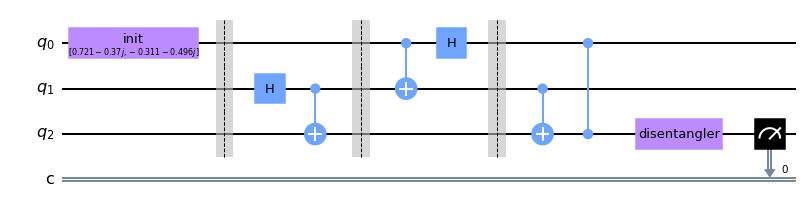

In [58]:
qc=qubit(1)
qc.draw('mpl')

{'0': 1024}


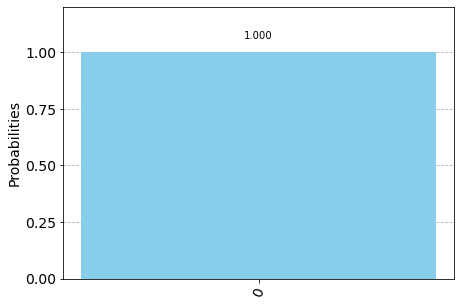

In [59]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'0': 901, '1': 123}


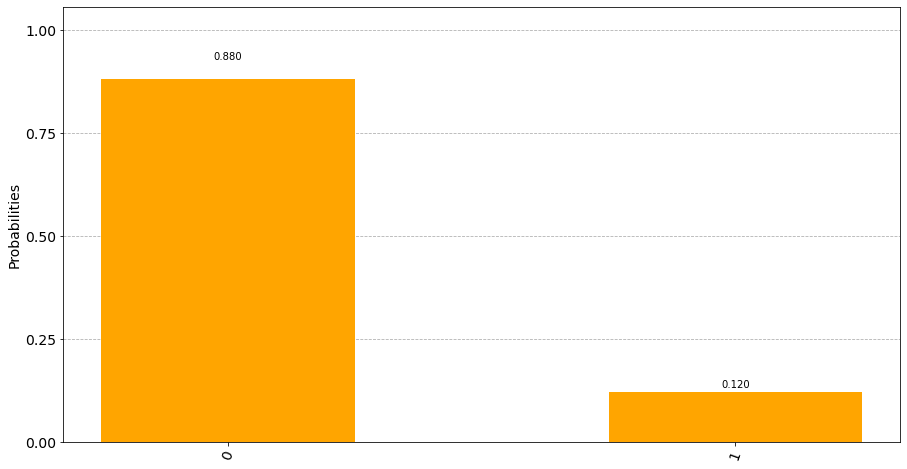

In [60]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

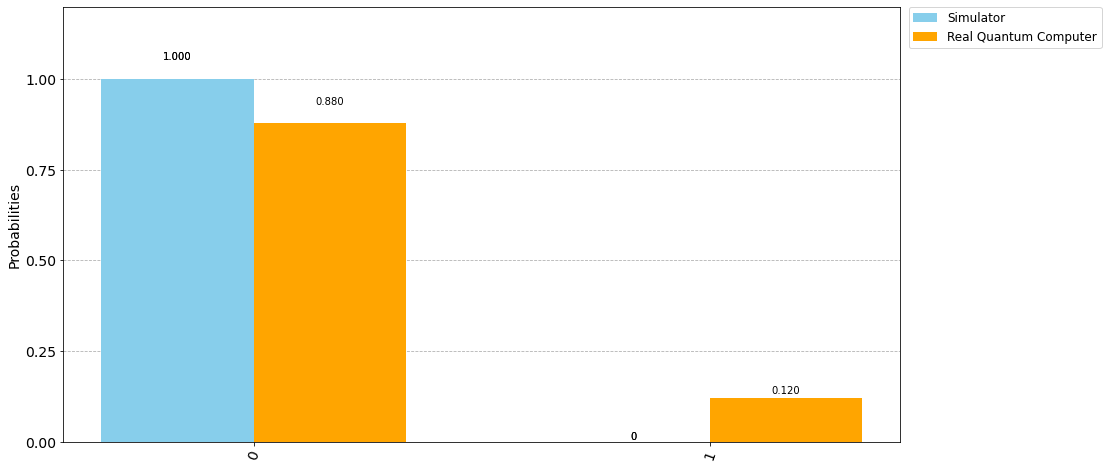

In [61]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])

## N = 2 Case

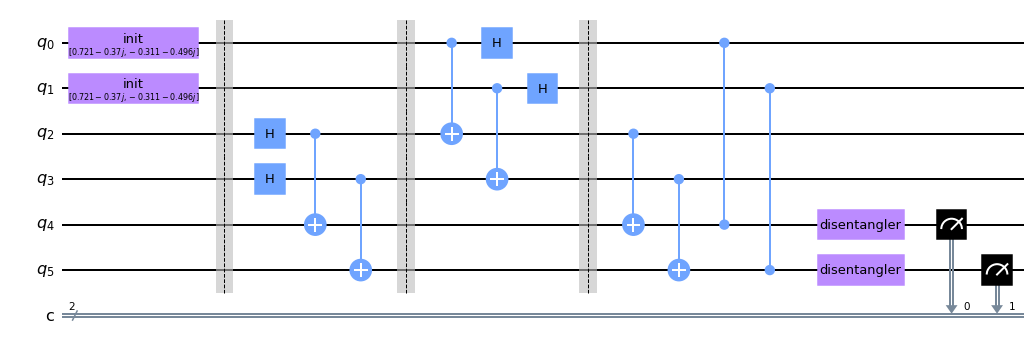

In [20]:
qc=qubit(2)
qc.draw('mpl')

{'00': 1024}


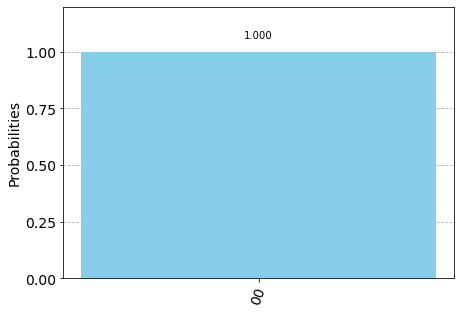

In [35]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'10': 70, '00': 870, '01': 78, '11': 6}


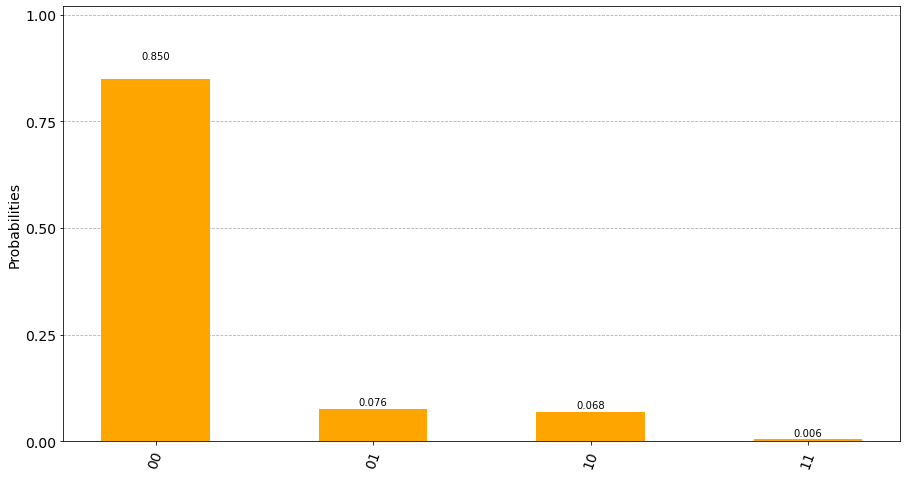

In [30]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

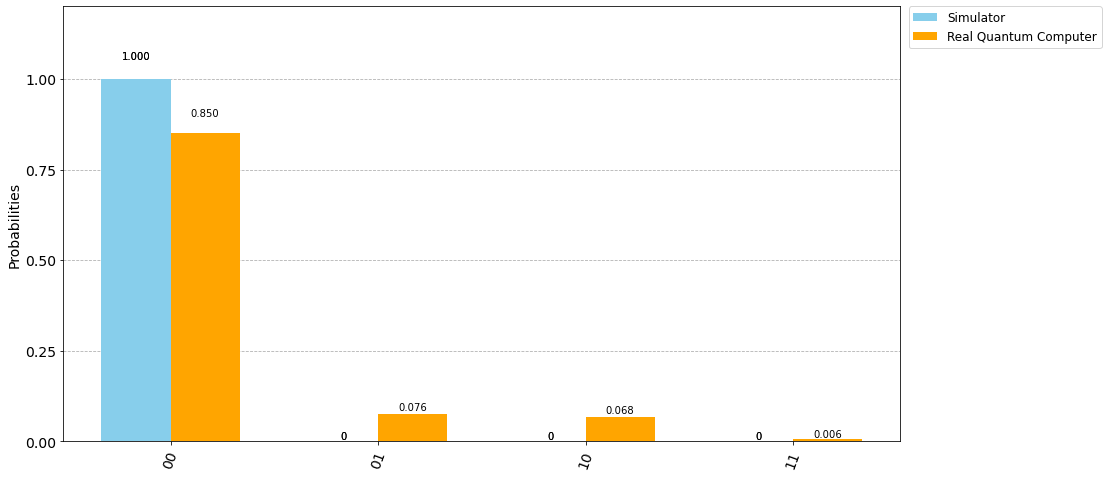

In [34]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])

## N = 3 Case

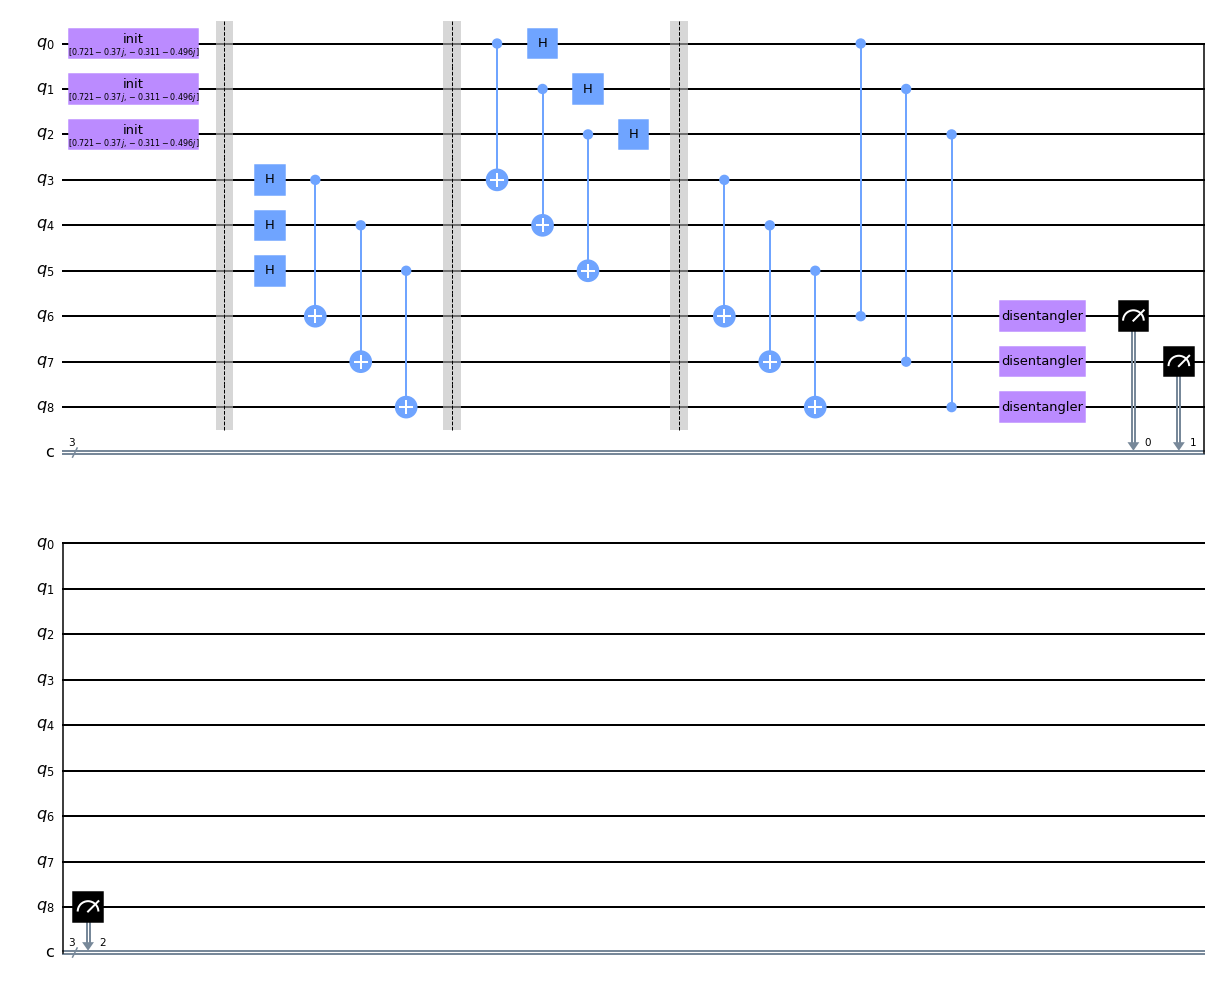

In [36]:
qc=qubit(3)
qc.draw('mpl')

{'000': 1024}


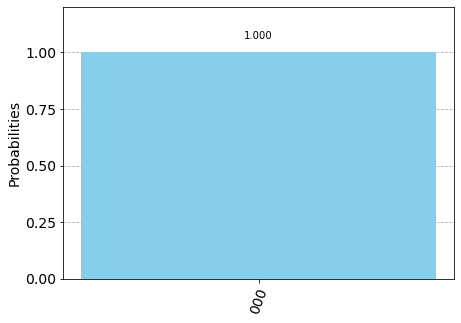

In [37]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'001': 71, '000': 786, '100': 54, '010': 81, '101': 11, '110': 6, '011': 13, '111': 2}


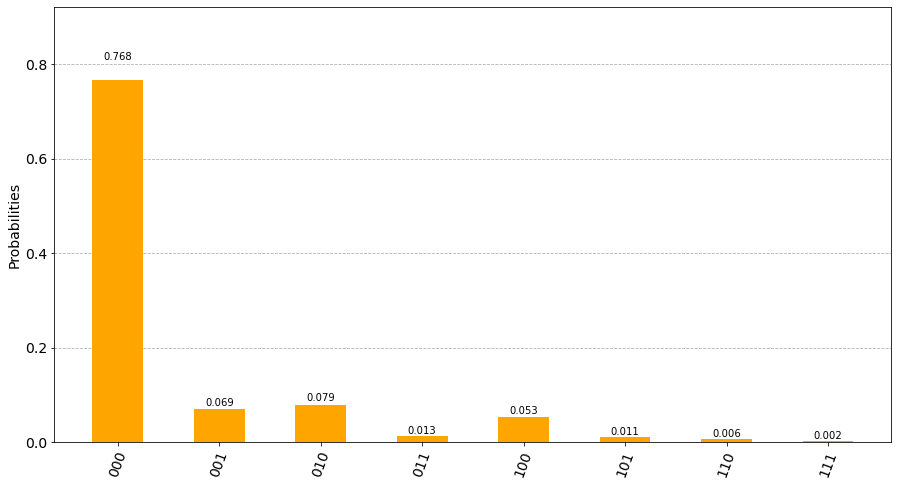

In [38]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

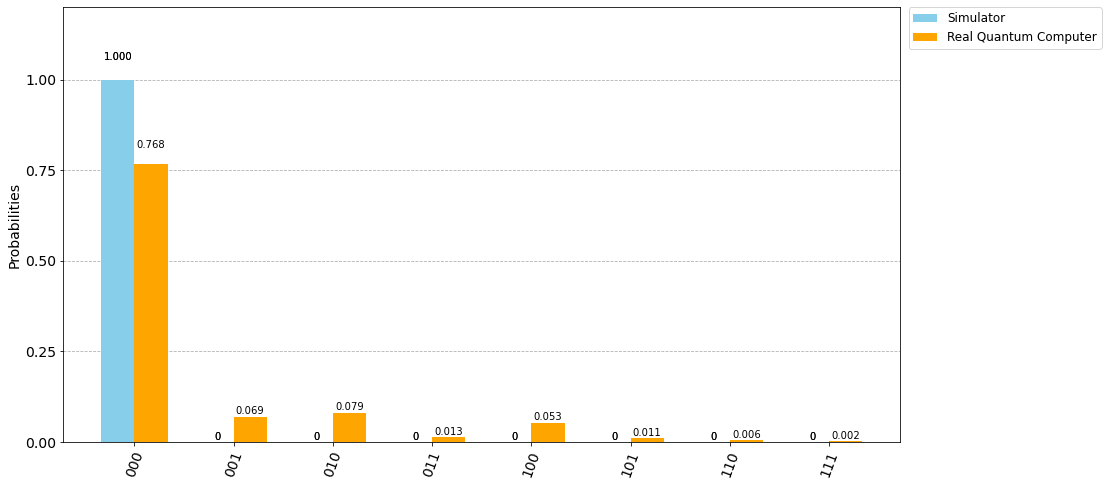

In [39]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])

## N = 4 Case

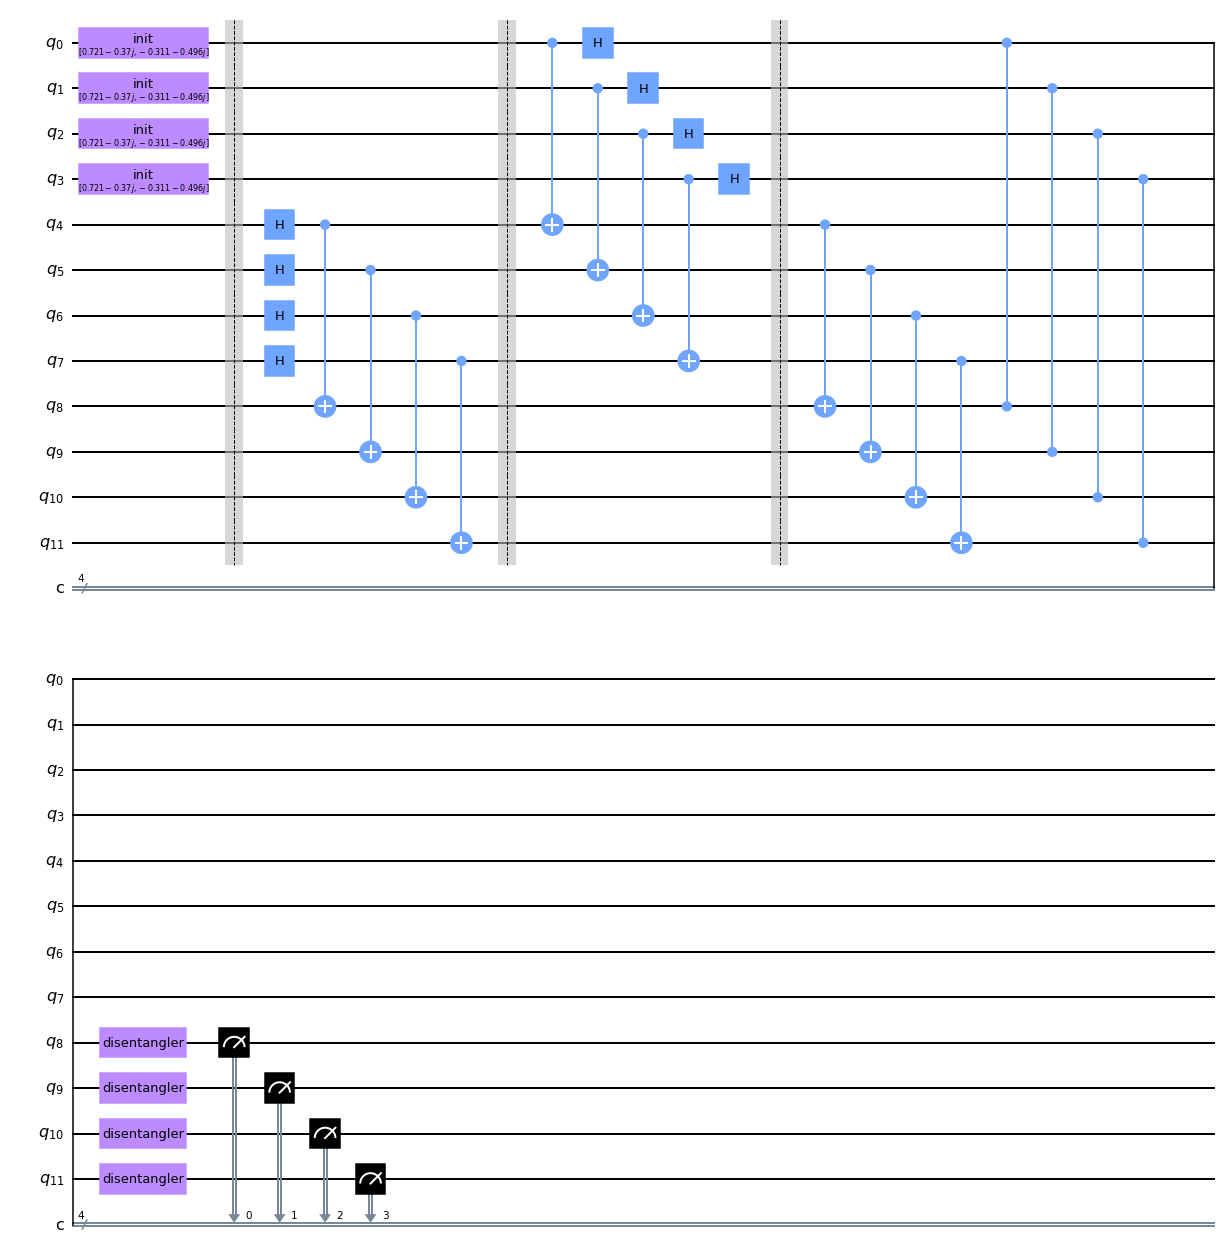

In [42]:
qc=qubit(4)
qc.draw('mpl')

{'0000': 1024}


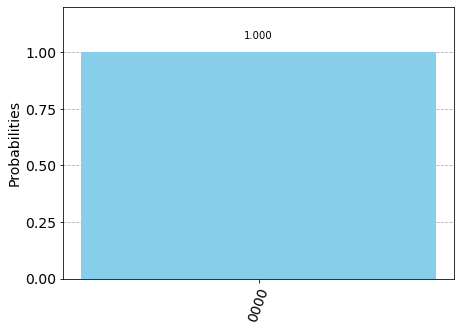

In [43]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'0000': 613, '1000': 105, '0100': 90, '0010': 84, '0001': 68, '0110': 12, '0101': 8, '0011': 7, '1100': 15, '1010': 10, '1011': 1, '0111': 3, '1111': 1, '1001': 7}


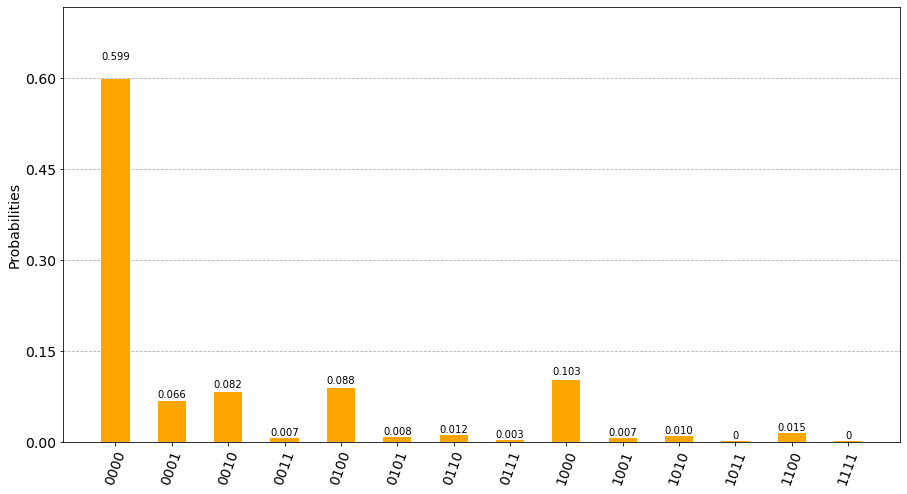

In [44]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

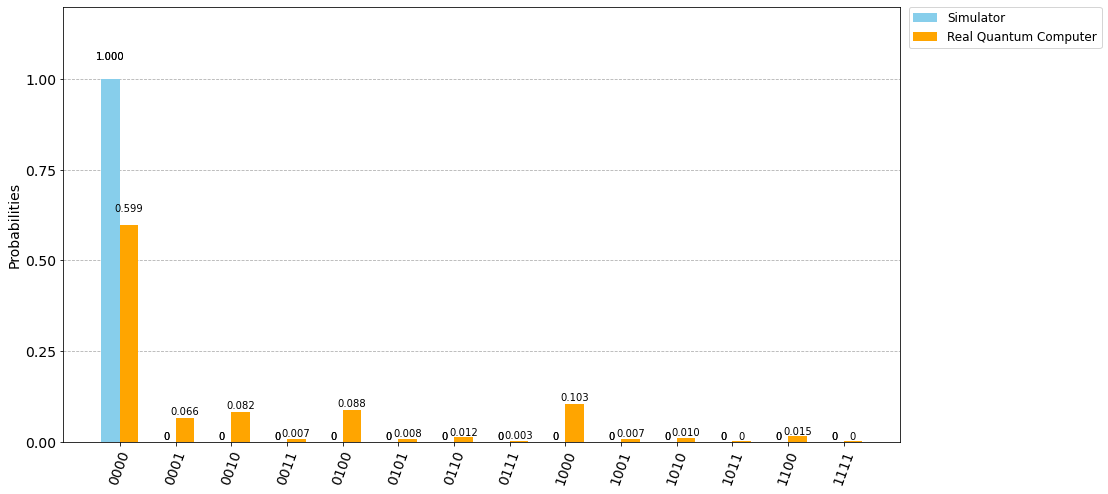

In [45]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])

## N = 5 Case

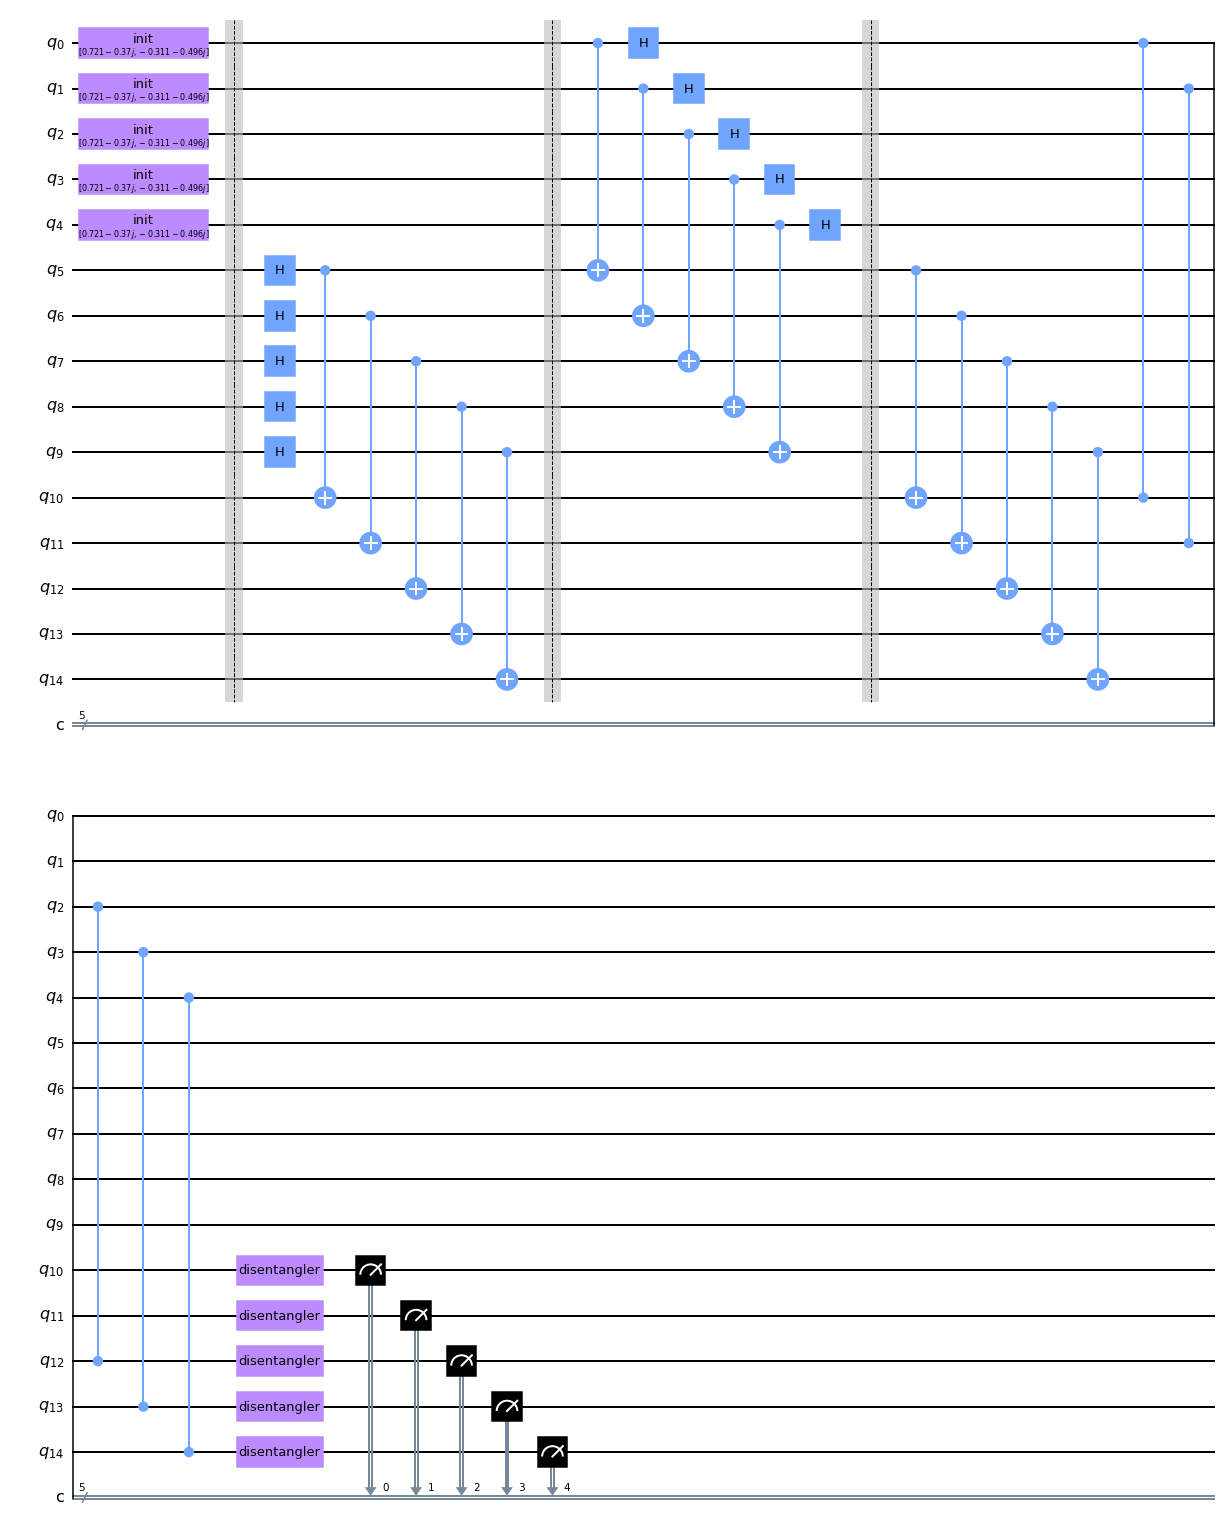

In [46]:
qc=qubit(5)
qc.draw('mpl')

{'00000': 1024}


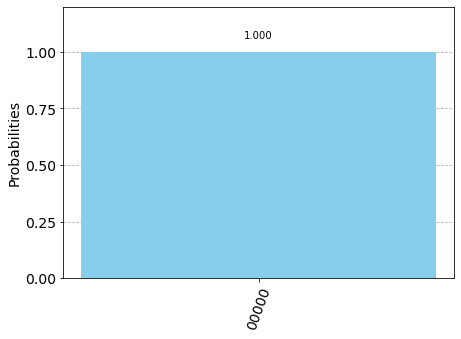

In [47]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'00010': 54, '01011': 28, '10011': 7, '11100': 21, '00100': 73, '10111': 12, '11101': 16, '01010': 45, '11010': 26, '01111': 14, '10000': 47, '00000': 102, '00101': 33, '10100': 38, '10110': 23, '00001': 41, '01000': 80, '11110': 16, '01110': 34, '11011': 9, '11001': 13, '01001': 40, '01100': 43, '11000': 28, '00011': 30, '10010': 25, '01101': 20, '10001': 23, '10101': 13, '00111': 19, '11111': 9, '00110': 42}


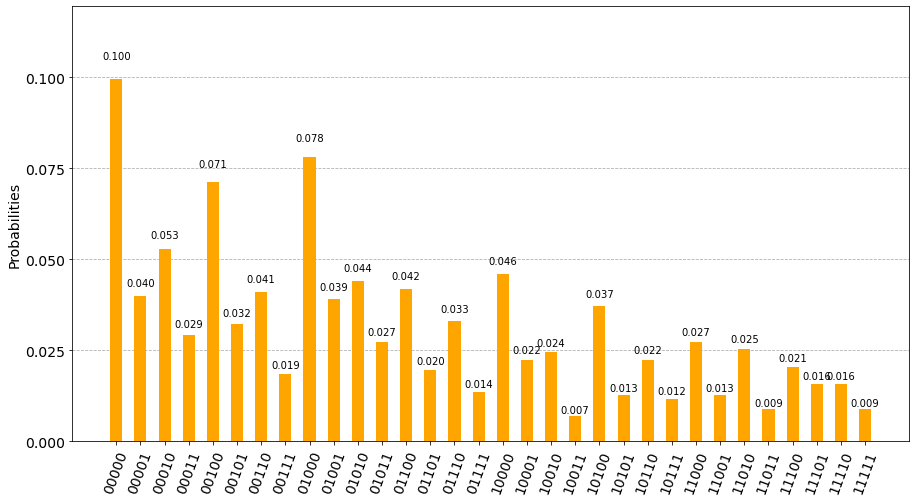

In [48]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

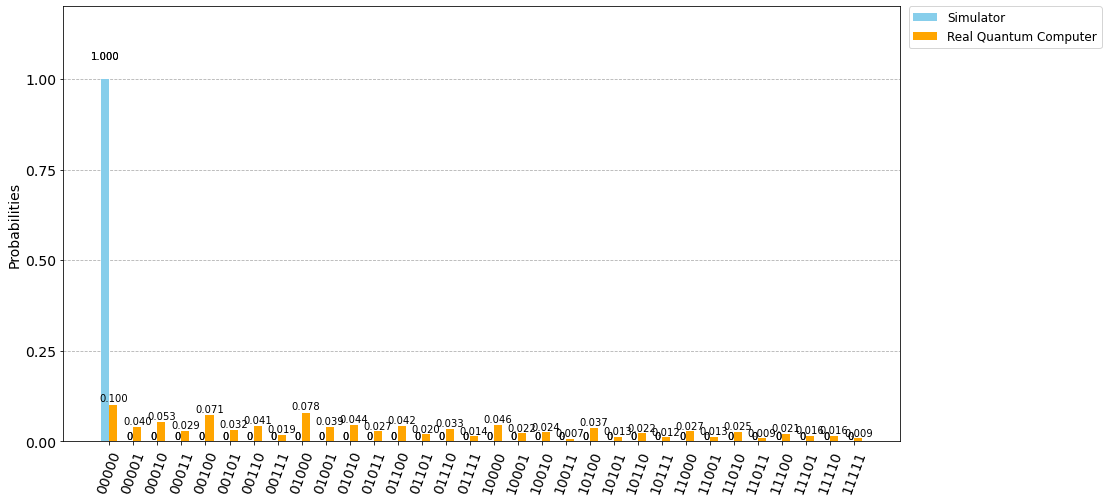

In [49]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])

## N = 6 Case

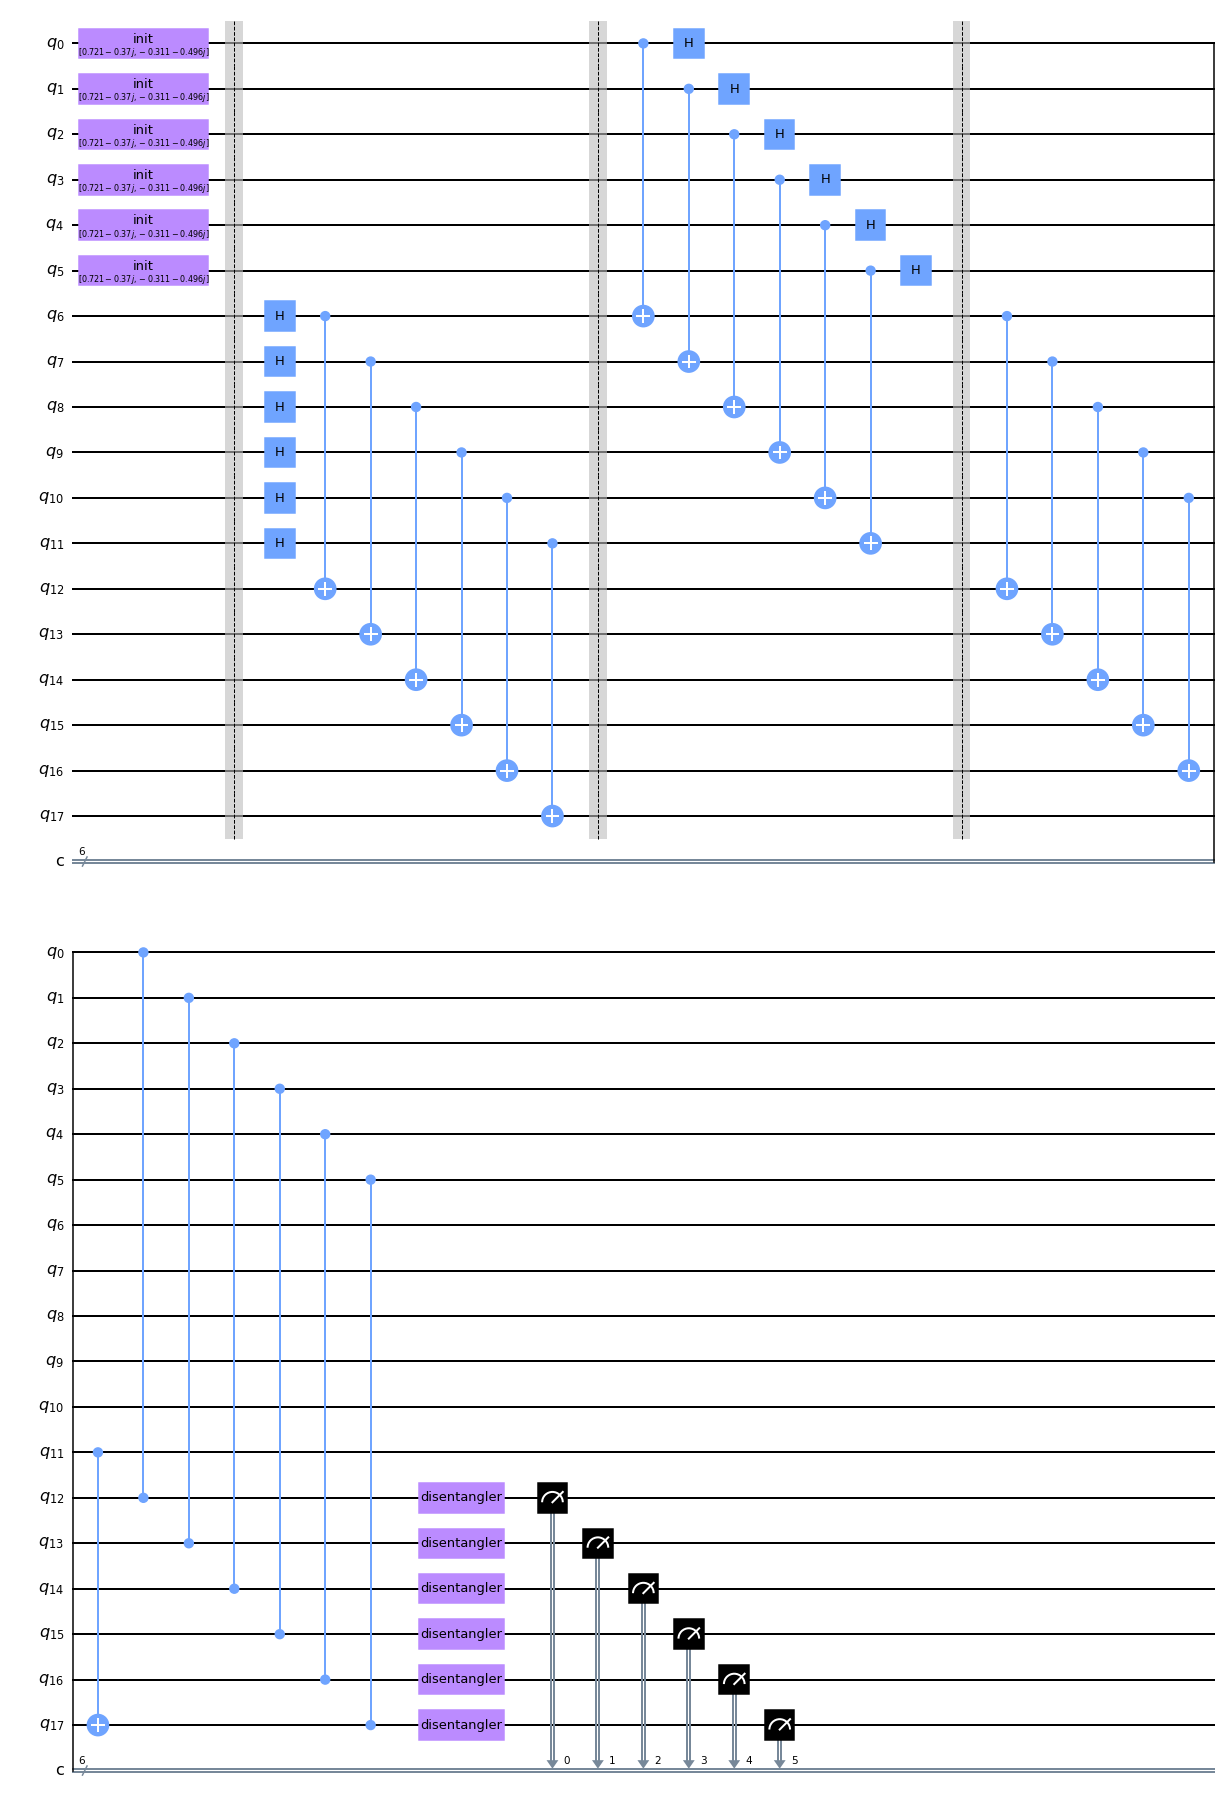

In [50]:
qc=qubit(6)
qc.draw('mpl')

{'000000': 1024}


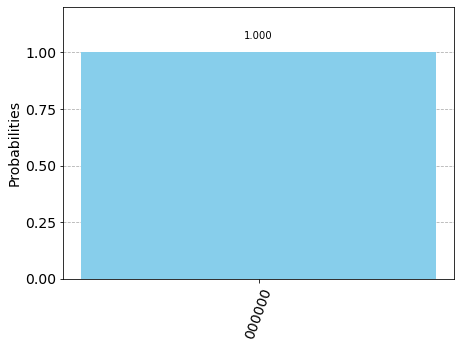

In [51]:
backend = Aer.get_backend('qasm_simulator')    
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts,color='skyblue')

{'010001': 16, '110111': 7, '000000': 99, '110011': 4, '101101': 7, '000100': 53, '010100': 35, '101011': 5, '110101': 8, '000010': 41, '010000': 53, '110110': 6, '101010': 11, '000001': 42, '111000': 19, '010011': 9, '000111': 8, '110000': 23, '100000': 43, '101000': 17, '111010': 4, '001111': 6, '100110': 7, '110100': 6, '101100': 12, '000011': 8, '001000': 43, '010010': 25, '011011': 3, '101111': 2, '110001': 14, '000110': 26, '110010': 6, '000101': 22, '101110': 10, '011100': 9, '111101': 2, '001100': 27, '100011': 10, '010110': 8, '001101': 13, '111100': 8, '100100': 20, '100001': 21, '111111': 2, '001010': 18, '011001': 24, '011000': 13, '001001': 18, '111110': 3, '001011': 6, '100010': 26, '011110': 7, '011111': 7, '101001': 8, '010101': 17, '010111': 4, '100111': 3, '111001': 8, '111011': 4, '100101': 6, '001110': 13, '011010': 13, '011101': 6}


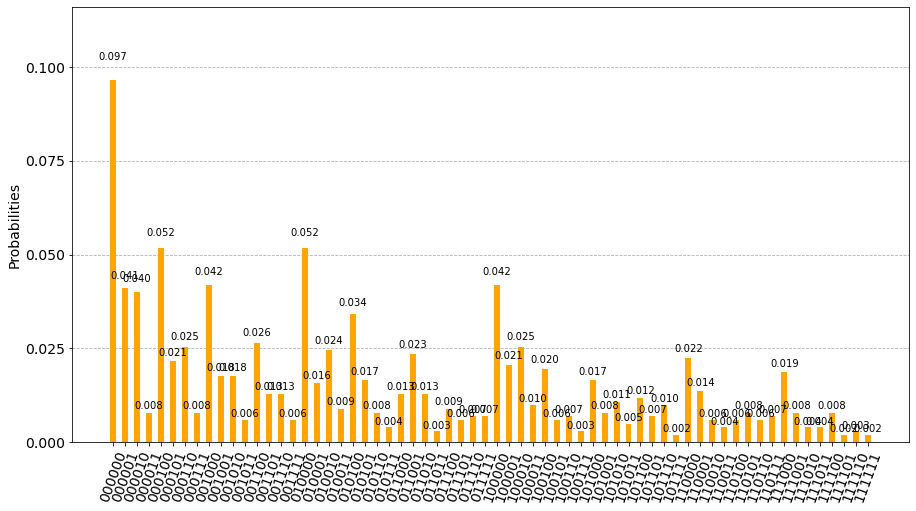

In [52]:
backend =  FakeTokyo()#FakeMelbourne()
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
result = job.result()
mcounts = result.get_counts(qc)
print(mcounts)
plot_histogram(mcounts, figsize=(15,8),color='orange')

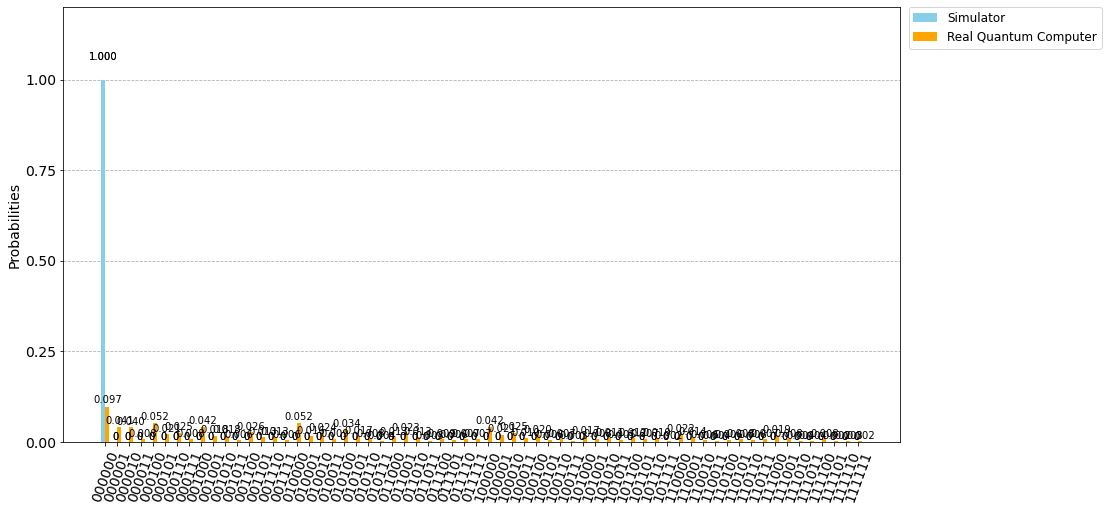

In [53]:
legend = ['Simulator','Real Quantum Computer']
plot_histogram([counts, mcounts], legend=legend,figsize=(15,8),color=['skyblue','orange'])